In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

<lambdifygenerated-43>:2: RuntimeWarning: divide by zero encountered in divide
  return 2/s**3


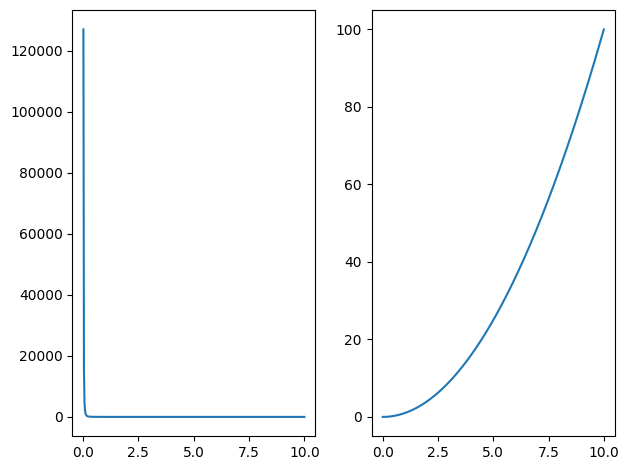

In [23]:
t = sp.symbols('t', positive=True)
s = sp.symbols('s')
y = t**2

Y = sp.laplace_transform(y, t, s)[0]
y_inv = sp.inverse_laplace_transform(Y, s, t)

# Convert sympy expressions to functions that can be evaluated numerically
Y_func = sp.lambdify(s, Y, "numpy")
y_inv_func = sp.lambdify(t, y_inv, "numpy")

# Generate x values
s_values = np.linspace(0, 10, 400)
t_values = np.linspace(0, 10, 400)

# Generate y values
Y_values = Y_func(s_values)
y_inv_values = y_inv_func(t_values)

# Plot the Laplace Transform
plt.subplot(1, 2, 1)
plt.plot(s_values, Y_values)

# Plot the Inverse Laplace Transform
plt.subplot(1, 2, 2)
plt.plot(t_values, y_inv_values)

plt.tight_layout()
plt.show()

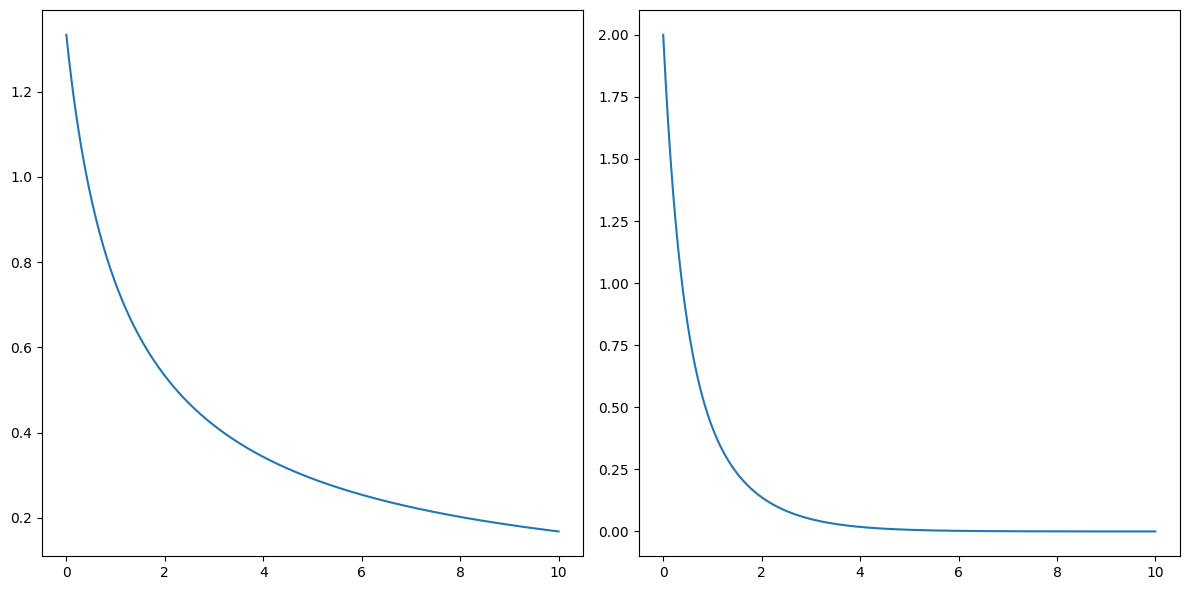

In [24]:

t = sp.symbols('t', positive=True)
s, a = sp.symbols('s a')
y = sp.exp(-a*t) + sp.exp(-3*a*t)

Y = sp.laplace_transform(y, t, s)[0]
y_inv = sp.inverse_laplace_transform(Y, s, t)

a_value = 1
Y = Y.subs(a, a_value)
y_inv = y_inv.subs(a, a_value)

Y_func = sp.lambdify(s, Y, "numpy")
y_inv_func = sp.lambdify(t, y_inv, "numpy")

Y_values = Y_func(s_values)
y_inv_values = y_inv_func(t_values)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(s_values, Y_values)

# Plot the Inverse Laplace Transform
plt.subplot(1, 2, 2)
plt.plot(t_values, y_inv_values)

plt.tight_layout()
plt.show()

<lambdifygenerated-49>:2: RuntimeWarning: divide by zero encountered in scalar power
  return s**(-1.0) - exp(-3*s)/s
<lambdifygenerated-49>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return s**(-1.0) - exp(-3*s)/s
<lambdifygenerated-49>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return s**(-1.0) - exp(-3*s)/s
<lambdifygenerated-50>:2: RuntimeWarning: divide by zero encountered in scalar power
  return s**(-1.0) - exp(-3*s)/s
<lambdifygenerated-50>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return s**(-1.0) - exp(-3*s)/s
<lambdifygenerated-50>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return s**(-1.0) - exp(-3*s)/s


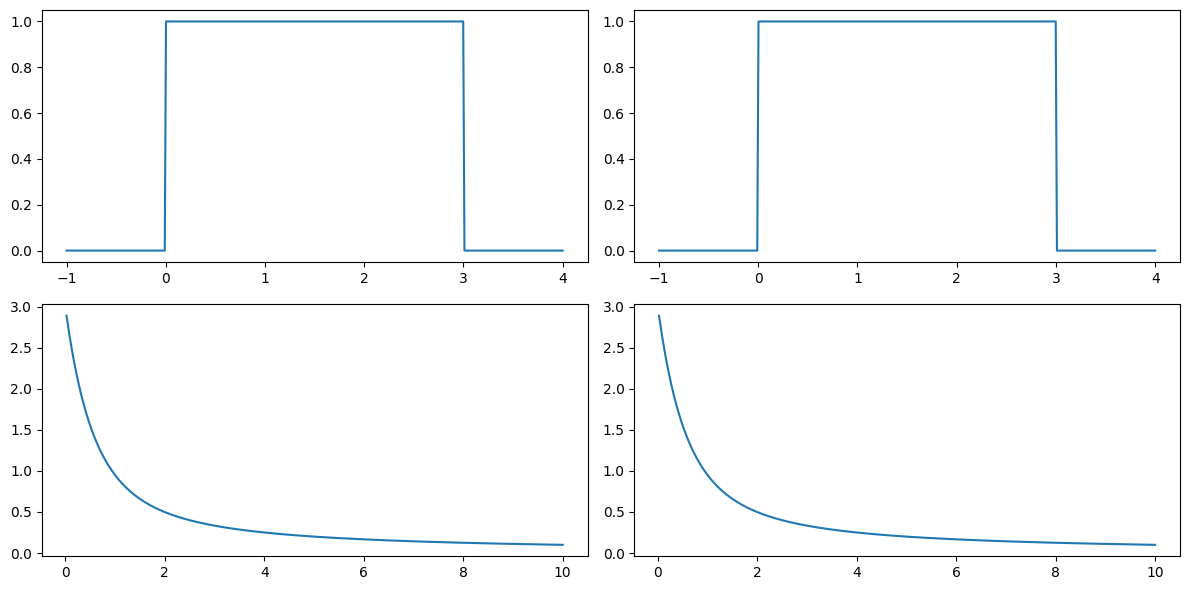

In [25]:
t, s = sp.symbols('t s')

# Define the unit step function
u = sp.Heaviside

# Define the functions
f = u(t)*u(3 - t)
g = u(t) - u(t - 3)

# Calculate the Laplace transforms
F_s = sp.laplace_transform(f, t, s)[0]
G_s = sp.laplace_transform(g, t, s)[0]

f_func = sp.lambdify(t, f, 'numpy')
g_func = sp.lambdify(t, g, 'numpy')
F = sp.lambdify(s, F_s, 'numpy')
G = sp.lambdify(s, G_s, 'numpy')

# Create an array of t values from -1 to 4 and s values from 0 to 10
t_values = np.linspace(-1, 4, 400)
s_values = np.linspace(0, 10, 400)

# Apply the functions to each t value
f_values = np.array([f_func(ti) for ti in t_values])
g_values = np.array([g_func(ti) for ti in t_values])

# Apply the functions to each s value
F_values = np.array([F(si) for si in s_values])
G_values = np.array([G(si) for si in s_values])

# Create the plots
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t_values, f_values)

plt.subplot(2, 2, 2)
plt.plot(t_values, g_values)

plt.subplot(2, 2, 3)
plt.plot(s_values, F_values)

plt.subplot(2, 2, 4)
plt.plot(s_values, G_values)

# Show the plots
plt.tight_layout()
plt.show()

<lambdifygenerated-52>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return select([logical_and.reduce((greater(s, NINF),less(s, PINF),not_equal(s, 0))),True], [(-s - 1)*exp(-2*s)/s**2 + exp(-s)/s**2,1/2], default=nan)
<lambdifygenerated-52>:2: RuntimeWarning: invalid value encountered in scalar add
  return select([logical_and.reduce((greater(s, NINF),less(s, PINF),not_equal(s, 0))),True], [(-s - 1)*exp(-2*s)/s**2 + exp(-s)/s**2,1/2], default=nan)


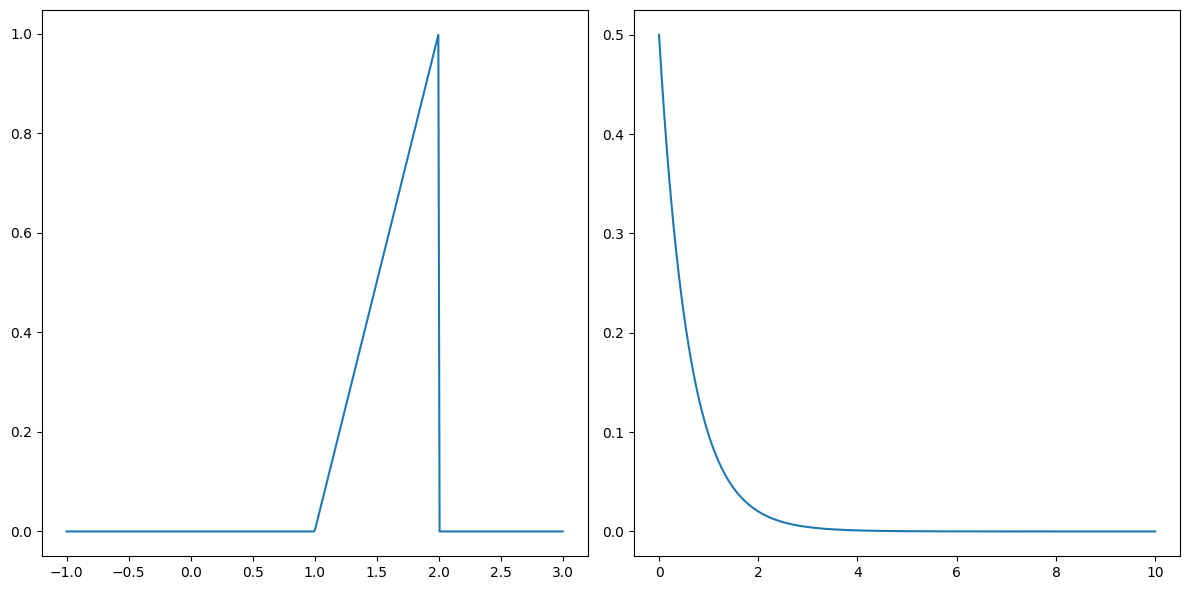

In [26]:
t, s = sp.symbols('t s')

# Define the function
def f(t):
    return sp.Piecewise((0, t < 1), (t - 1, t < 2), (0, True))

# Calculate the Laplace transform
F_s = sp.laplace_transform(f(t), t, s)[0]

# Convert f and F_s to lambda functions for plotting
f_func = sp.lambdify(t, f(t), 'numpy')
F = sp.lambdify(s, F_s, 'numpy')

# Create an array of t values from -1 to 3 and s values from 0 to 10
t_values = np.linspace(-1, 3, 400)
s_values = np.linspace(0, 10, 400)

# Apply the function to each t value
f_values = np.array([f_func(ti) for ti in t_values])

# Apply the function to each s value
F_values = np.array([F(si) for si in s_values])

# Create the plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, f_values)

plt.subplot(1, 2, 2)
plt.plot(s_values, F_values)

# Show the plots
plt.tight_layout()
plt.show()

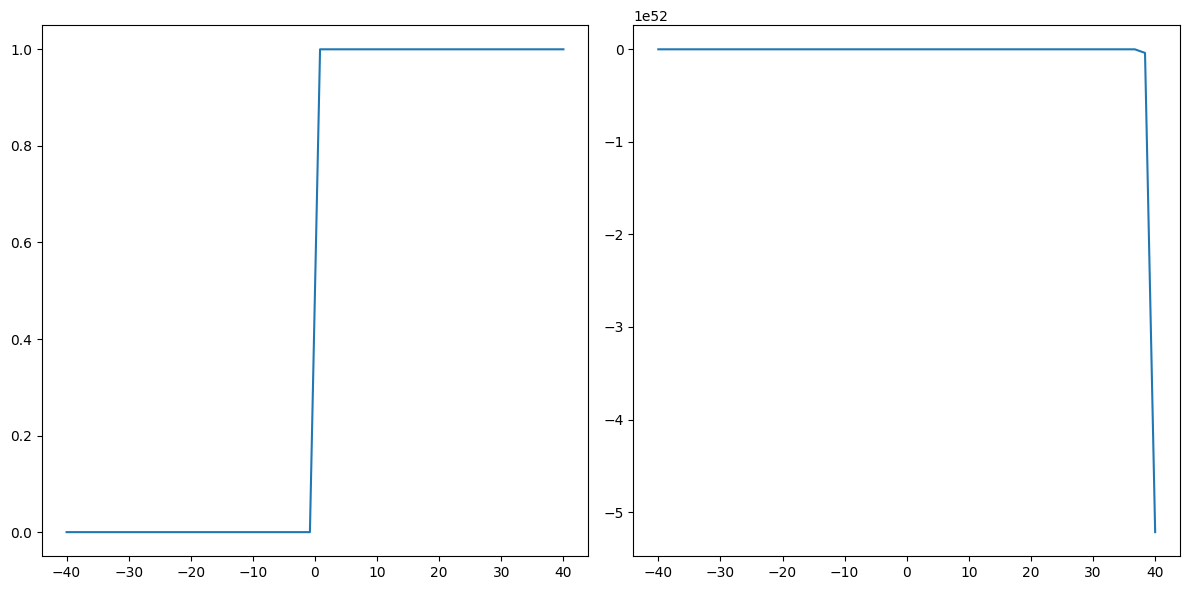

In [27]:
# Define the symbols
t, s = sp.symbols('t s')

# Define the functions
F1_s = 1/s
F2_s = 10/(s**2 + 25) - 4/(s - 3)

# Calculate the inverse Laplace transforms
f1_t = sp.inverse_laplace_transform(F1_s, s, t)
f2_t = sp.inverse_laplace_transform(F2_s, s, t)

# Verify the results by applying the Laplace transform to them
F1_s_check = sp.laplace_transform(f1_t, t, s)[0]
F2_s_check = sp.laplace_transform(f2_t, t, s)[0]

# Convert f1_t and f2_t to lambda functions for plotting
f1 = sp.lambdify(t, f1_t, 'numpy')
f2 = sp.lambdify(t, f2_t, 'numpy')

# Create an array of t values from 0 to 10
t_values = np.linspace(-40, 40)

# Apply the functions to each t value
f1_values = np.array([f1(ti) for ti in t_values])
f2_values = np.array([f2(ti) for ti in t_values])

# Create the plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, f1_values)

plt.subplot(1, 2, 2)
plt.plot(t_values, f2_values)

# Show the plots
plt.tight_layout()
plt.show()

<lambdifygenerated-56>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return -exp(-4*s)/s + exp(-2*s)/s**2 - exp(-3*s)/s**2
<lambdifygenerated-56>:2: RuntimeWarning: invalid value encountered in scalar add
  return -exp(-4*s)/s + exp(-2*s)/s**2 - exp(-3*s)/s**2


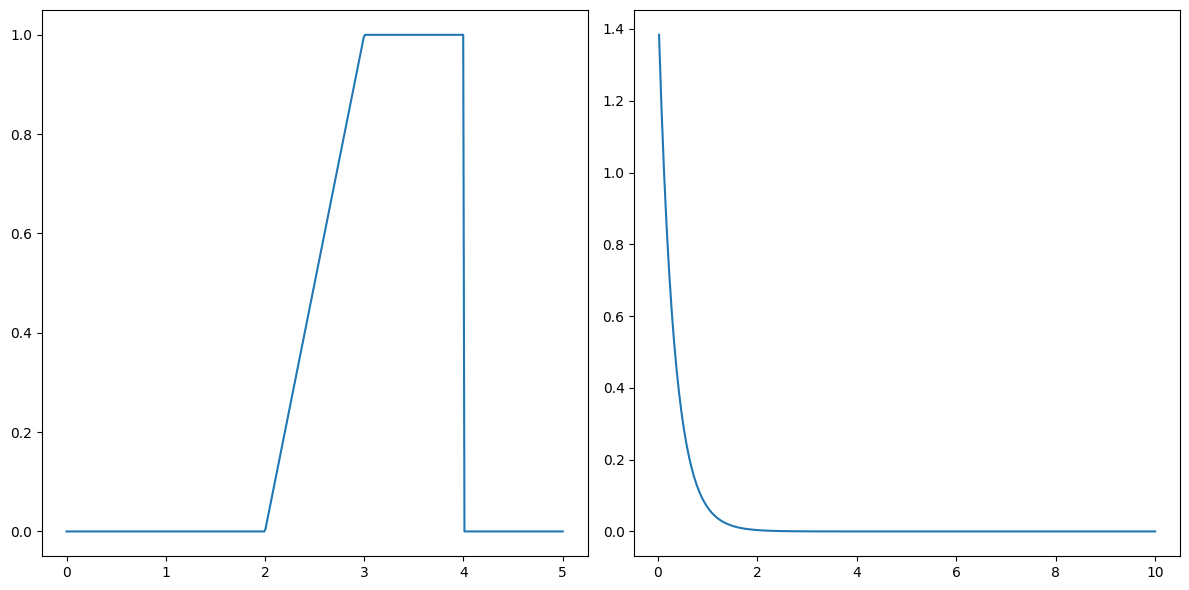

In [28]:
# Define the symbols
t, s = sp.symbols('t s')

# Define the Heaviside step function
u = sp.Heaviside

# Define the function f(t)
f = (t-2) * (u(t-2) - u(t-3)) + u(t-3) - u(t-4)

# Calculate the Laplace transform of f(t)
F_s = sp.laplace_transform(f, t, s)[0]

# Convert f and F_s to lambda functions for plotting
f_func = sp.lambdify(t, f, 'numpy')
F = sp.lambdify(s, F_s, 'numpy')

# Create an array of t values from 0 to 5 and s values from 0 to 10
t_values = np.linspace(0, 5, 400)
s_values = np.linspace(0, 10, 400)

# Apply the function to each t value
f_values = np.array([f_func(ti) for ti in t_values])

# Apply the function to each s value
F_values = np.array([F(si) for si in s_values])

# Create the plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_values, f_values)

plt.subplot(1, 2, 2)
plt.plot(s_values, F_values)

# Show the plots
plt.tight_layout()
plt.show()